In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import copy
import random

In [ ]:
n_samples = 100

X, y = datasets.make_regression(
    n_samples=n_samples,
    n_features=1, 
    noise = 10,
)

print(f"Shape of the X - Feature: {X.shape} \nShape of the y - Target: {y.shape}\n")
print(f"Features: \n{X[:5]} \n\n\nTarget: \n{y[:5]}")

Shape of the X - Feature: (100, 1) 
Shape of the y - Target: (100,)

Features: 
[[ 0.46560211]
 [ 0.24467041]
 [ 2.01524614]
 [-1.79358286]
 [ 1.19508964]] 


Target: 
[ 14.93533943   2.44613591 110.51792082 -94.97966588  67.54437668]


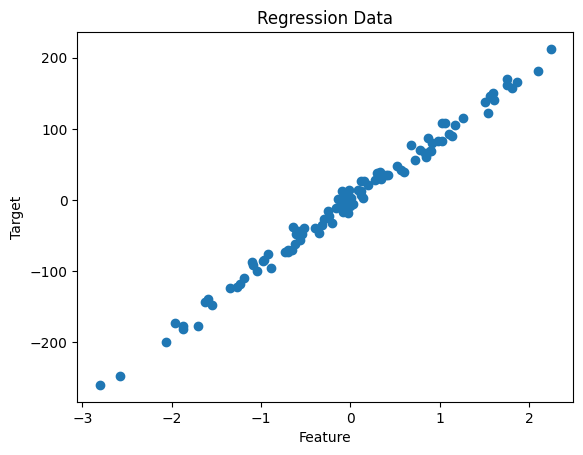

In [87]:
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Data');

In [25]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        loss = (f_wb - y[i]) ** 2
        cost += loss
    total_cost = 1 /(2*m) * cost

    return total_cost

In [26]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw/m 
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [48]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in)

    J_history = []
    p_history = []
    
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw 
        b = b - alpha * dj_db

        J_history.append(cost_function(x, y, w , b))
        p_history.append([w,b])

        if i%100 == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}",
                  f"w: {w}, b:{b}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [49]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

In [ ]:
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration 0: Cost [704.60148578] dj_dw: [-36.94726769], dj_db: [4.93245847] w: [0.36947268], b:[-0.04932458]
Iteration 100: Cost [125.07545144] dj_dw: [-13.45109682], dj_db: [-0.2928917] w: [23.45971066], b:[-1.62269901]
Iteration 200: Cost [46.98459479] dj_dw: [-5.01688259], dj_db: [-0.88035461] w: [31.95258882], b:[-0.88058542]
Iteration 300: Cost [35.43330506] dj_dw: [-1.91540498], dj_db: [-0.61400592] w: [35.15216713], b:[-0.11833051]
Iteration 400: Cost [33.58671837] dj_dw: [-0.7472322], dj_db: [-0.33736783] w: [36.38526234], b:[0.34764464]
Iteration 500: Cost [33.27468012] dj_dw: [-0.29712195], dj_db: [-0.1678553] w: [36.87037028], b:[0.59102224]
Iteration 600: Cost [33.22004802] dj_dw: [-0.12007883], dj_db: [-0.07923129] w: [37.06466138], b:[0.70901772]
Iteration 700: Cost [33.21027945] dj_dw: [-0.04918247], dj_db: [-0.03624152] w: [37.14365459], b:[0.76387784]
Iteration 800: Cost [33.20851176] dj_dw: [-0.02036185], dj_db: [-0.01624782] w: [37.17616614], b:[0.78873351]
Iteration

In [100]:
print(f"Final Weights(w) and Biases(b) found by gradient descent: ({w_final},{b_final})")

Final Weights(w) and Biases(b) found by gradient descent: ([37.19947234],[0.80844706])


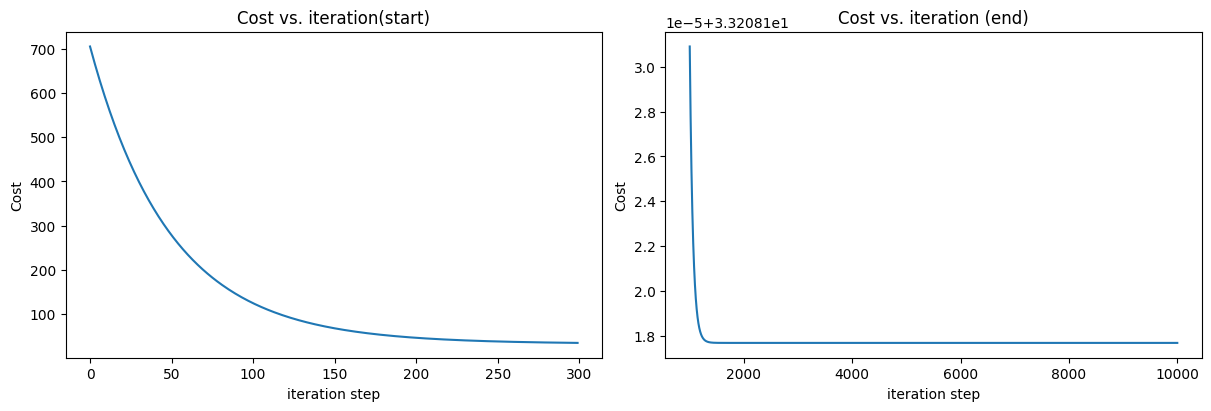

In [55]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:300])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [67]:
def make_prediction(feature, w, b):
    return w * feature[0] + b

print(f"1000 sqft house prediction {make_prediction([-1.27702691], w_final, b_final)} Thousand dollars")

1000 sqft house prediction [-46.69628015] Thousand dollars


In [71]:
prediction = [make_prediction(X[i], w_final, b_final) for i in range(X.shape[0])]

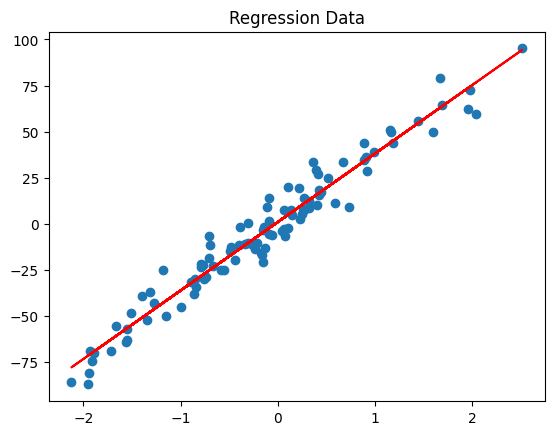

In [77]:
plt.scatter(X, y)
plt.plot(X, prediction, color = 'red')
plt.title('Regression Data');